In [ ]:
import random as rd

Variant = 20
rd.seed(Variant)

Numbers_of_problems = [i+1 for i in rd.sample(range(11),2)]
Numbers_of_problems


[11, 3]

# file.asm



```
;Function exit
exit:
    mov rax,1
    mov rbx,0
    int 0x80

;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret


;The function makes new line
; rdi - descriptor
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret

;The function prints minus
; rdi - descriptor
print_minus:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, '-'
   push rax
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret

;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push r8
    push rcx
    push rbx
    xor rax, rax
    xor rcx,rcx
    xor r8, r8
    cmp byte [rsi], '-'
    jne     .loop
    mov     r8, 1
    inc     rcx
    .loop:
        xor     rbx, rbx
        mov     bl, byte [rsi+rcx]
        cmp     bl, 48
        jl      .finished
        cmp     bl, 57
        jg      .finished

        sub     bl, 48
        add     rax, rbx
        mov     rbx, 10
        mul     rbx
        inc     rcx
        jmp     .loop

    .finished:
        cmp     rcx, 0
        je .restore
        mov     rbx, 10
        div     rbx
    
    .restore:
        pop rbx
        pop rcx
        cmp r8, 1
        jne .end
        neg rax
    .end:
    pop r8
    ret

;Function printing of string
;input rsi - place of memory of begin string
; rdi - descriptor
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    push rbx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    syscall
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;Function printing of char
;input rax - char
; rdi - descriptor
print_char:
    push rdi
    push rsi
    push rdx
    push rcx
    push rbx
    push rax
    mov rsi, rsp
    mov rdx, 1
    mov rax, 1
    syscall
    pop rax
    pop rbx
    pop rcx
    pop rdx
    pop rsi
    pop rdi
    ret

;Function printing of number
;input rax - place of memory of number
; rdi - descriptor
print_num:
    push rsi
    push rdi
    push rdx
    push rcx
    push rbx
    push rax
    cmp rax, 0
    jnl @f
    call print_minus
    neg rax
    @@:
    xor rbx, rbx
    mov rbx, 10
    xor rcx, rcx
    .div_loop:
        xor rdx, rdx
        div rbx
        add rdx, '0'
        push rdx
        inc rcx
        cmp rax, 0
        jne .div_loop
    .print_loop:
        xor rax, rax
        pop rax
        call print_char
        dec rcx
        cmp rcx, 0
        jne .print_loop
    pop rax
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rsi
    ret

;Function reading of string
;input rsi - place of memory to place string, rdx - length
; rdi - descriptor
;output rsi - string
read:
    push rax
    push rdi
    push rdx
    push rcx
    push rbx
    mov rax, 0
    syscall
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;Function reading of string from file
;input rsi - place of memory to place string,
; rdi - descriptor
;output rsi - string, rax - length
readline:
    push rdx
    push rcx
    push rbx

    xor rcx, rcx
    xor rbx, rbx
    .loop:
        push rcx
        mov rax, 0
        mov rdx, 1
        syscall
        pop rcx
        cmp rax, 0
        je .end
        cmp byte[rsi], 0xA
        je .end
        cmp byte[rsi], 0
        je .end
        inc rsi
        inc rcx
        jmp .loop
    .end:
    mov byte[rsi], 0
    sub rsi, rcx
    mov rax, rcx
    
    pop rbx
    pop rcx
    pop rdx
    ret

;multiplication for 2 operands
macro mul2 op1, op2
{
    push rax
    push rbx
    mov rax, op1
    mov rbx, op2
    mul rbx
    mov op1, rax
    pop rbx
    pop rax
}

```



# #11
Для заданного записать в файл все простые числа от 1 до n. После этого оставить только простые числа, заканчивающиеся на единицу. Имена файлов и значение вводится c клавиатуры.



```
format ELF64

public _start

include 'file.asm'

section '.bss' writable
    input: times 20 db ?
    filename1: times 20 db ?
    filename2: times 20 db ?

section '.text' executable
_start:
    ; читаем название первого файла
    mov rdi, 0
    mov rsi, filename1
    mov rdx, 20
    call read

    ; открываем первый файл
    mov rax, 2
    mov rdi, filename1
    mov rsi, 1102o
    mov rdx, 777o
    syscall
    mov r8, rax

    ; читаем название второго файла
    mov rdi, 0
    mov rsi, filename2
    mov rdx, 20
    call read

    ; открываем второй файл
    mov rax, 2
    mov rdi, filename2
    mov rsi, 1101o
    mov rdx, 777o
    syscall
    mov r9, rax

    ; читаем n
    mov rdi, 0
    mov rsi, input
    mov rdx, 20
    call read
    xor rax, rax
    mov rsi, input
    call str_number
    mov rbx, rax
    inc rbx
    mov rcx, 2
    .loop1:

        push rbx
        push rdx
        mov rdi, r8
        mov rbx, 2
        .check_loop:    ; проверка на простое
            cmp rbx, rcx
            je .print
            mov rax, rcx
            xor rdx, rdx
            div rbx
            cmp rdx, 0
            je @f
            inc rbx
            cmp rbx, rcx
            jne .check_loop
        .print:
        mov rax, rcx
        call print_num
        call new_line

        @@:
        pop rdx
        pop rbx

        inc rcx
        cmp rcx, rbx
        jne .loop1

    mov rax, 8
    mov rdi, r8
    mov rsi, 0
    mov rdx, 0
    syscall

    ; пишем во второй файл числа из первого, которые заканчиваются на 1
    mov rsi, input
    .loop2:
        mov rdi, r8
        call readline
        cmp rax, 0
        je .finish
        cmp byte[input+rax-1], '1'
        jne .loop2
        
        mov rdi, r9
        call print_str
        call new_line
        jmp .loop2

    .finish:
        call exit

```



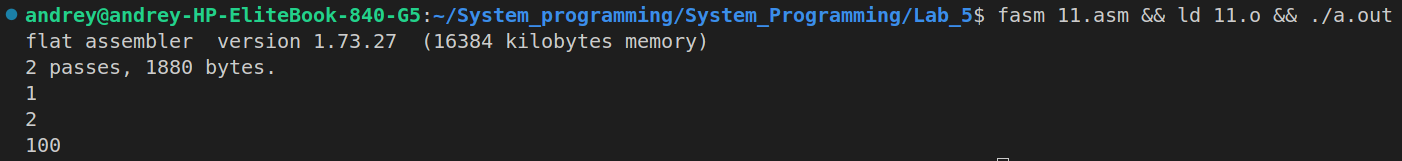

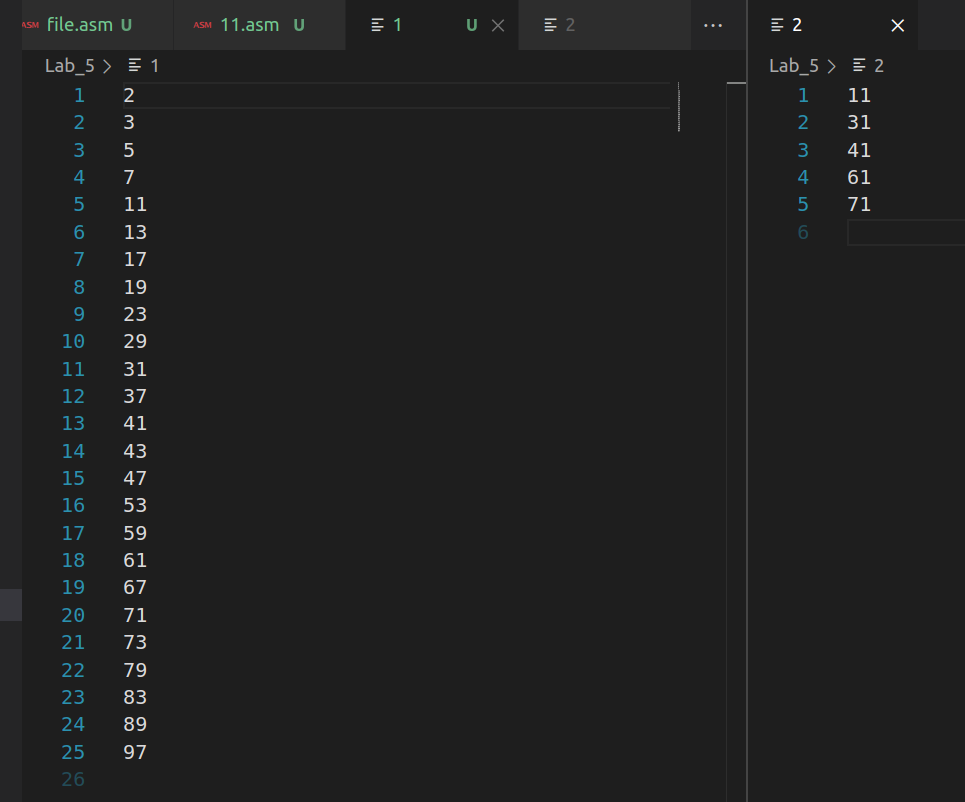

# #3
Для заданного текстового файла (латиница) прочитать все строки (строка заканчивается символом разрыва строки) и записать их во второй файл в обратном порядке: первая строка первого файла должна стать последней во втором и т.д. Имена файлов передавать параметрами командной строки.



```
format ELF64

public _start

include 'file.asm'

section '.bss' writable
    input db ?

section '.text' executable
_start:

    mov rax, 2
    mov rdi, [rsp+16]
    mov rsi, 0o
    mov rdx, 777o
    syscall
    mov r8, rax

    mov rax, 2
    mov rdi, [rsp+24]
    mov rsi, 1101o
    mov rdx, 777o
    syscall
    mov r9, rax

    mov rax, 8
    mov rdi, r8
    mov rsi, 0
    mov rdx, 2
    syscall
    mov r10, rax

    .loop:

        xor rbx, rbx
        .read_loop:

            mov rax, 0
            mov rdi, r8
            mov rsi, input
            mov rdx, 1
            syscall
            
            cmp byte[rsi], 0xA
            je .next

            cmp byte[rsi], 0
            je @f
            cmp byte[rsi], 0x03
            je @f

            mov cl, byte[rsi]
            push rcx
            inc rbx

            @@:
            cmp r10, 0
            je .next
            
            dec r10
            mov rax, 8
            mov rdi, r8
            mov rsi, r10
            mov rdx, 0
            syscall
            jmp .read_loop

        .next:  
        
        mov rax, 1
        mov rdi, r9
        mov rsi, input
        mov rdx, 1

        .print_loop:
            cmp rbx, 0
            je .check

            pop rcx
            mov byte[rsi], cl
            syscall
            
            dec rbx
            jmp .print_loop
    
        .check:
            cmp r10, 0
            je .finish
            call new_line
            dec r10
            mov rax, 8
            mov rdi, r8
            mov rsi, r10
            mov rdx, 0
            syscall
            jmp .loop

    .finish:
        call exit

```



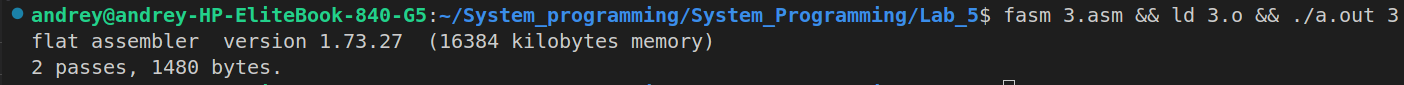

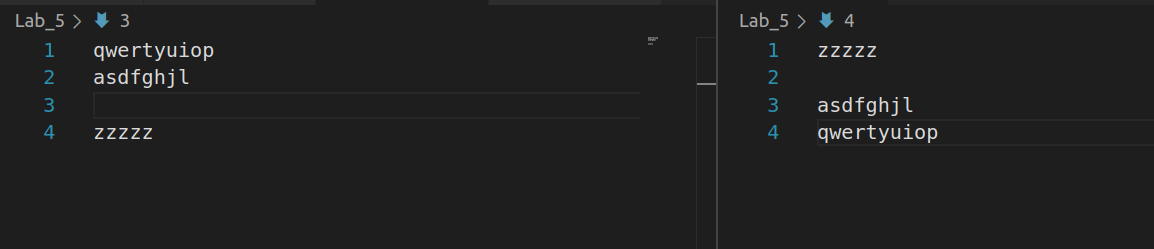